In [1]:
#Import Processing setup
!pip install xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree
!pip install graphviz
!pip install pydotplus
import graphviz 
import pydotplus
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

import webbrowser

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 286kB 9.5MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


# Data Processing

In [2]:
#link data
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-10-17 12:25:55--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  41.7MB/s   in 1.7s   

2020-10-17 12:25:57 (41.7 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
#Import and read dataframe
df = pd.read_csv('Data-Collisions.csv')
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
#Check dataframe shape
df.shape

(194673, 38)

In [5]:
#Remove elements with null values, undefined or other in WEATHER, ROADCOND, or LIGHTCOND 

# Drop all rows with null values in WEATHER, ROADCOND, LIGHTCOND and SEVERITYCODE

df=df.dropna(subset=['WEATHER', 'ROADCOND','LIGHTCOND'])
#print shape to verify rows dropped

print(df.shape)


(189337, 38)


In [6]:
# Drop all rows with Other or Unknown values in WEATHER, ROADCOND, LIGHTCOND and SEVERITYCODE
df=df[df.WEATHER != 'Unknown']
df=df[df.WEATHER != 'Other']

df=df[df.ROADCOND != 'Unknown']
df=df[df.ROADCOND != 'Other']

df=df[df.LIGHTCOND != 'Unknown']
df=df[df.LIGHTCOND != 'Other']

#Drop spurious columns x, y, COLDETKEY, REPORTNO, STATUS, SDOTCOLNUM, ST_COLCODE, ST_COLDESC, SEGLANEKEY, CROSSWALKKEY, HITPARKEDCAR
df=df.drop(columns=['X', 'Y','COLDETKEY','REPORTNO', 'STATUS','SDOTCOLNUM','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR'])
#print shape to verify rows dropped
print(df.shape)

(169957, 27)


In [7]:
#Check scrubbed dataframe
df.head(100)

,SEVERITYCODE,OBJECTID,INCKEY,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,...,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
0,2,1,1307,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN
1,1,2,52200,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,...,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN
2,1,3,26700,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,...,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,NaN
3,1,4,1144,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,...,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN
4,2,5,17700,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,NaN
5,1,6,320840,Intersection,36974.0,24TH AVE NW AND NW 85TH ST,,NaN,1,Property Damage Only Collision,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN
6,1,7,83300,Intersection,29510.0,DENNY WAY AND WESTLAKE AVE,NaN,NaN,1,Property Damage Only Collision,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,NaN
7,2,9,330897,Intersection,29745.0,BROADWAY AND E PIKE ST,,NaN,2,Injury Collision,...,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Clear,Dry,Daylight,NaN,NaN
8,1,10,63400,Block,NaN,PINE ST BETWEEN 5TH AVE AND 6TH AVE,NaN,NaN,1,Property Damage Only Collision,...,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight,NaN,NaN
9,2,12,58600,Intersection,34679.0,41ST AVE SW AND SW THISTLE ST,NaN,NaN,2,Injury Collision,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight,NaN,NaN


In [8]:
#Check IncKey and df shape to verify unqiue numbers
print(df['INCKEY'].nunique())

print(df.shape)

df['SPEEDING'].value_counts()


169957
(169957, 27)


Y    9085
Name: SPEEDING, dtype: int64

In [9]:
#Encode key variables numerically

#Encoding Light Conditions
df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df["LIGHTCOND"].replace("Dusk", 3, inplace=True)
df["LIGHTCOND"].replace("Dawn", 4, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", 5, inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", 6, inplace=True)


#Encoding Weather Conditions
df["WEATHER"].replace("Clear", 0, inplace=True)
df["WEATHER"].replace("Raining", 1, inplace=True)
df["WEATHER"].replace("Overcast", 2, inplace=True)
df["WEATHER"].replace("Snowing", 3, inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke", 4, inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 5, inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt", 6, inplace=True)
df["WEATHER"].replace("Severe Crosswind", 7, inplace=True)
df["WEATHER"].replace("Partly Cloudy", 8, inplace=True)

#Encoding Road Conditions
df["ROADCOND"].replace("Dry", 0, inplace=True)
df["ROADCOND"].replace("Wet", 1, inplace=True)
df["ROADCOND"].replace("Ice", 2, inplace=True)
df["ROADCOND"].replace("Snow/Slush", 3, inplace=True)
df["ROADCOND"].replace("Standing Water", 4, inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", 5, inplace=True)
df["ROADCOND"].replace("Oil", 6, inplace=True)

#Encode SPEEDING, INATTENTIONIND and UNDERINFL
df["SPEEDING"].replace(np.nan, 0, inplace=True)
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df["UNDERINFL"].replace(np.nan, 0, inplace=True)


df["SPEEDING"].replace("Y", 1, inplace=True)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)

df["SPEEDING"].replace("N", 0, inplace=True)
df["INATTENTIONIND"].replace("N", 0, inplace=True)
df["UNDERINFL"].replace("N", 0, inplace=True)



df.head(10)

,SEVERITYCODE,OBJECTID,INCKEY,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,...,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
0,2,1,1307,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,2,1,0,NaN,0
1,1,2,52200,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,...,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,0,1,1,1,NaN,0
2,1,3,26700,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,...,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,0,2,0,0,NaN,0
3,1,4,1144,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,...,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,0,0,0,NaN,0
4,2,5,17700,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,1,1,0,NaN,0
5,1,6,320840,Intersection,36974.0,24TH AVE NW AND NW 85TH ST,,NaN,1,Property Damage Only Collision,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,0,0,0,NaN,0
6,1,7,83300,Intersection,29510.0,DENNY WAY AND WESTLAKE AVE,NaN,NaN,1,Property Damage Only Collision,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,1,1,0,NaN,0
7,2,9,330897,Intersection,29745.0,BROADWAY AND E PIKE ST,,NaN,2,Injury Collision,...,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,0,0,0,0,0,NaN,0
8,1,10,63400,Block,NaN,PINE ST BETWEEN 5TH AVE AND 6TH AVE,NaN,NaN,1,Property Damage Only Collision,...,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,0,0,0,NaN,0
9,2,12,58600,Intersection,34679.0,41ST AVE SW AND SW THISTLE ST,NaN,NaN,2,Injury Collision,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,0,0,0,NaN,0


In [10]:
#Making new dataframe with only variables and unique keys
selected_columns=df[["INCKEY","INCDTTM","WEATHER","UNDERINFL","ROADCOND","LIGHTCOND","SPEEDING","INATTENTIONIND","SEVERITYCODE"]]
feature_df=selected_columns.copy()
feature_df.dropna(axis=0,how='any',inplace=True)
feature_stats=feature_df.describe()

feature_df.head(10)

,INCKEY,INCDTTM,WEATHER,UNDERINFL,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,SEVERITYCODE
0,1307,3/27/2013 2:54:00 PM,2,0,1,0,0,0,2
1,52200,12/20/2006 6:55:00 PM,1,0,1,1,0,0,1
2,26700,11/18/2004 10:20:00 AM,2,0,0,0,0,0,1
3,1144,3/29/2013 9:26:00 AM,0,0,0,0,0,0,1
4,17700,1/28/2004 8:04:00 AM,1,0,1,0,0,0,2
5,320840,4/20/2019 5:42:00 PM,0,0,0,0,0,0,1
6,83300,12/9/2008,1,0,1,0,0,0,1
7,330897,4/15/2020 5:47:00 PM,0,0,0,0,0,0,2
8,63400,6/15/2006 1:00:00 PM,0,0,0,0,0,0,1
9,58600,3/20/2006 3:49:00 PM,0,0,0,0,0,0,2


In [11]:
#Break down the dataframe into Severity 1 data and Severity 2 data t0 allow correlations to be explored
#Severity 1 dataframe

Sev1_df=feature_df[feature_df.SEVERITYCODE != 2]

#Severity 2 dataframe

Sev2_df=feature_df[feature_df.SEVERITYCODE != 1]


In [12]:
#Break down the dataframe into Severity 1 data and Severity 2 data with no compounding factors (no speeding, no inattention, no intoxication)
#Severity 1 dataframe

aSev1_df=Sev1_df[Sev1_df.UNDERINFL != 1]

bSev1_df=aSev1_df[aSev1_df.SPEEDING != 1]

cleanSev1_df=bSev1_df[bSev1_df.INATTENTIONIND != 1]

#Severity 2 dataframe

aSev2_df=Sev2_df[Sev2_df.UNDERINFL != 1]

bSev2_df=aSev2_df[aSev2_df.SPEEDING != 1]

cleanSev2_df=bSev2_df[bSev2_df.INATTENTIONIND != 1]


print(Sev2_df.shape)
print(Sev1_df.shape)

print(cleanSev2_df.shape)
print(cleanSev1_df.shape)



(55683, 9)
(114274, 9)
(40857, 9)
(88259, 9)


# Machine Learning - All Data

## One Hot Encoding

In [13]:
feature_df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER  SEVERITYCODE
0        1               0.673035
         2               0.326965
1        1               0.660684
         2               0.339316
2        1               0.679679
         2               0.320321
3        1               0.801212
         2               0.198788
4        1               0.669078
         2               0.330922
5        1               0.738318
         2               0.261682
6        1               0.695652
         2               0.304348
7        1               0.720000
         2               0.280000
8        2               0.600000
         1               0.400000
Name: SEVERITYCODE, dtype: float64

In [14]:
feature_df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND  SEVERITYCODE
0          1               0.661866
           2               0.338134
1          1               0.694896
           2               0.305104
2          1               0.771307
           2               0.228693
3          1               0.663598
           2               0.336402
4          1               0.665976
           2               0.334024
5          1               0.722621
           2               0.277379
6          1               0.625000
           2               0.375000
Name: SEVERITYCODE, dtype: float64

In [15]:
feature_df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND  SEVERITYCODE
0         1               0.673570
          2               0.326430
1         1               0.664688
          2               0.335312
2         1               0.756481
          2               0.243519
3         1               0.813926
          2               0.186074
4         1               0.733333
          2               0.266667
5         1               0.661538
          2               0.338462
6         1               0.600000
          2               0.400000
Name: SEVERITYCODE, dtype: float64

In [16]:
#Let our feature set be X (excluding severitycode)
Feature =  feature_df[['WEATHER','UNDERINFL','ROADCOND','LIGHTCOND','SPEEDING','INATTENTIONIND']]

X = feature_df[['WEATHER','UNDERINFL','ROADCOND','LIGHTCOND','SPEEDING','INATTENTIONIND']]

X[0:5]

,WEATHER,UNDERINFL,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND
0,2,0,1,0,0,0
1,1,0,1,1,0,0
2,2,0,0,0,0,0
3,0,0,0,0,0,0
4,1,0,1,0,0,0


In [17]:
#let our labels be Y

Y = feature_df['SEVERITYCODE'].values

print(Y)

[2 1 1 ... 2 2 1]


In [18]:
#Normalize X
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.79168786, -0.23618714,  1.30988802, -0.54888383, -0.23764147,
        -0.44940792],
       [ 0.56237301, -0.23618714,  1.30988802,  0.59184655, -0.23764147,
        -0.44940792],
       [ 1.79168786, -0.23618714, -0.57885829, -0.54888383, -0.23764147,
        -0.44940792],
       [-0.66694184, -0.23618714, -0.57885829, -0.54888383, -0.23764147,
        -0.44940792],
       [ 0.56237301, -0.23618714,  1.30988802, -0.54888383, -0.23764147,
        -0.44940792]])

In [19]:

#Train-Test Split - assume test size = 0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print("OK")

OK


In [20]:
#Training
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMtx=[];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.47164039, 0.65944928, 0.51950459, 0.53918569, 0.51906331,
       0.66009649, 0.52777124, 0.54021534, 0.53344905, 0.66686279,
       0.66633325, 0.66868675, 0.6665686 , 0.6671864 ])

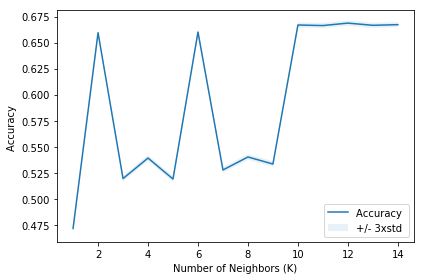

The best accuracy was with 0.6686867498234879 with k= 12


In [21]:
plt.plot(range(1,Ks),mean_acc)
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

neigh = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X_train, y_train)



In [22]:
#rebuild the model with K = 12
from sklearn.neighbors import KNeighborsClassifier
k = 12
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

In [23]:
yhatKNN = kNN_model.predict(X_test)
yhatKNN[0:5]

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, kNN_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatKNN))

from sklearn.metrics import f1_score
f1_score(y_test, yhatKNN, average='weighted') 

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhatKNN)

print ("Jaccard Similarity: ",jaccard_similarity_score(y_test, yhatKNN))
print ("F1 Score: ",f1_score(y_test, yhatKNN, average='weighted'))

Train set Accuracy:  0.6681425366822344
Test set Accuracy:  0.6686867498234879
Jaccard Similarity:  0.6686867498234879
F1 Score:  0.552273798552947


In [24]:
print(yhatKNN)

print(y_test)

e=yhatKNN-y_test

print("Count where predicted matches actual:",np.count_nonzero(e == 0) )

print("Count where severe predicted, minor actual:", np.count_nonzero(e == 1))

print("Count where minor predicted, severe actual:", np.count_nonzero(e == -1))

[2 1 1 ... 1 1 1]
[1 1 1 ... 2 1 1]
Count where predicted matches actual: 22730
Count where severe predicted, minor actual: 399
Count where minor predicted, severe actual: 10863


# Decision Tree

In [25]:
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree



#Modelling
modeltree = DecisionTreeClassifier(criterion="entropy")
modeltree.fit(X_train, y_train)

#Prediction
predTree = modeltree.predict(X_test)
print(predTree[0:5])
print(y_test[0:5])

names = Feature.columns

print(names)

print("DecisionTree Accuracy: ", metrics.accuracy_score(y_test, predTree))
print ("f1 score : ", f1_score(y_test, predTree, average='weighted'))
print ("jaccard similarity score : ", jaccard_similarity_score(y_test, predTree))

[1 1 1 1 1]
[1 1 1 1 1]
Index(['WEATHER', 'UNDERINFL', 'ROADCOND', 'LIGHTCOND', 'SPEEDING',
       'INATTENTIONIND'],
      dtype='object')
DecisionTree Accuracy:  0.6725994351612145
f1 score :  0.5443074212271202
jaccard similarity score :  0.6725994351612145


In [26]:
print(predTree)

print(y_test)

f=predTree-y_test

print("Count where predicted matches actual:",np.count_nonzero(f == 0) )

print("Count where severe predicted, minor actual:", np.count_nonzero(f == 1))

print("Count where minor predicted, severe actual:", np.count_nonzero(f == -1))

[1 1 1 ... 1 1 1]
[1 1 1 ... 2 1 1]
Count where predicted matches actual: 22863
Count where severe predicted, minor actual: 69
Count where minor predicted, severe actual: 11060


# Support Vector Machine

In [27]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import svm

#Modelling
clf = svm.SVC(kernel="sigmoid")
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [28]:
#Predict
yhat = clf.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 2])

In [29]:
#Evaluation
from sklearn.metrics import f1_score
print("F1 Score",f1_score(y_test,yhat, average="weighted"))
print("array",yhat)

F1 Score 0.5774300165482842
array [1 1 1 ... 1 1 2]


In [30]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6082607672393504

In [31]:
print(yhat)

print(y_test)

g=yhat-y_test

print("Count where predicted matches actual:",np.count_nonzero(g == 0) )

print("Count where severe predicted, minor actual:", np.count_nonzero(g == 1))

print("Count where minor predicted, severe actual:", np.count_nonzero(g == -1))

[1 1 1 ... 1 1 2]
[1 1 1 ... 2 1 1]
Count where predicted matches actual: 20676
Count where severe predicted, minor actual: 4473
Count where minor predicted, severe actual: 8843


# Logistic Regression

In [32]:
#Modelling
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver="liblinear").fit(X_train,y_train)

In [33]:
#Predict
yhat_LRR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

#Evaluation
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,yhat_LRR)

0.6728936220287126

In [34]:
yhat_LRR

array([1, 1, 1, ..., 1, 1, 1])

In [35]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_LRR)

from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

from sklearn.metrics import f1_score
f1_score(y_test, yhat_LRR, average='weighted')


print ("Jaccard Similarity: ",jaccard_similarity_score(y_test, yhat_LRR))
print ("F1 Score: ",f1_score(y_test, yhat_LRR, average='weighted'))
print ("Log Loss: ",log_loss(y_test, yhat_prob))

Jaccard Similarity:  0.6728936220287126
F1 Score:  0.5413441909886492
Log Loss:  0.6311613116629152


In [36]:
print(yhat_LRR)

print(y_test)

h=yhat_LRR-y_test

print("Count where predicted matches actual:",np.count_nonzero(h == 0) )

print("Count where severe predicted, minor actual:", np.count_nonzero(h == 1))

print("Count where minor predicted, severe actual:", np.count_nonzero(h == -1))

[1 1 1 ... 1 1 1]
[1 1 1 ... 2 1 1]
Count where predicted matches actual: 22873
Count where severe predicted, minor actual: 1
Count where minor predicted, severe actual: 11118


In [37]:
#Model Evaluation - summary
knn_pred=neigh.predict(X_test)
jc1=jaccard_similarity_score(y_test, knn_pred)
fs1=f1_score(y_test, knn_pred, average='weighted')

tree_pred=modeltree.predict(X_test)
jc2=jaccard_similarity_score(y_test, tree_pred)
fs2=f1_score(y_test, tree_pred, average='weighted')

svm_pred=clf.predict(X_test)
jc3=jaccard_similarity_score(y_test, svm_pred)
fs3=f1_score(y_test, svm_pred, average='weighted')

log_pred=LR.predict(X_test)
proba=LR.predict_proba(X_test)
jc4=jaccard_similarity_score(y_test, log_pred)
fs4=f1_score(y_test, log_pred, average='weighted')  
ll4=log_loss(y_test, proba)

list_jc = [jc1, jc2, jc3, jc4]
list_fs = [fs1, fs2, fs3, fs4]
list_ll = ['NA', 'NA', 'NA', ll4]


import pandas as pd

# fomulate the report format
df1 = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df1.columns = ['Jaccard']
df1.insert(loc=1, column='F1-score', value=list_fs)
df1.insert(loc=2, column='LogLoss', value=list_ll)
df1.columns.name = 'Algorithm'
df1

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.668687,0.552274,NA
Decision Tree,0.672599,0.544307,NA
SVM,0.608261,0.577430,NA
Logistic Regression,0.672894,0.541344,0.631161


# Machine Learning - Excluding speeding, intoxication, obvious distraction

## One Hot Encoding

In [38]:
f1df=feature_df[feature_df.UNDERINFL != 1]

f2df=f1df[f1df.SPEEDING != 1]

cleanfeature_df=f2df[f2df.INATTENTIONIND != 1]

cleanfeature_df.head()

,INCKEY,INCDTTM,WEATHER,UNDERINFL,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,SEVERITYCODE
0,1307,3/27/2013 2:54:00 PM,2,0,1,0,0,0,2
1,52200,12/20/2006 6:55:00 PM,1,0,1,1,0,0,1
2,26700,11/18/2004 10:20:00 AM,2,0,0,0,0,0,1
3,1144,3/29/2013 9:26:00 AM,0,0,0,0,0,0,1
4,17700,1/28/2004 8:04:00 AM,1,0,1,0,0,0,2


In [39]:
cleanfeature_df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER  SEVERITYCODE
0        1               0.685930
         2               0.314070
1        1               0.666764
         2               0.333236
2        1               0.689302
         2               0.310698
3        1               0.824232
         2               0.175768
4        1               0.690722
         2               0.309278
5        1               0.730769
         2               0.269231
6        1               0.684211
         2               0.315789
7        1               0.750000
         2               0.250000
8        2               0.600000
         1               0.400000
Name: SEVERITYCODE, dtype: float64

In [40]:
cleanfeature_df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND  SEVERITYCODE
0          1               0.670867
           2               0.329133
1          1               0.712117
           2               0.287883
2          1               0.794508
           2               0.205492
3          1               0.678943
           2               0.321057
4          1               0.675138
           2               0.324862
5          1               0.743462
           2               0.256538
6          1               0.625000
           2               0.375000
Name: SEVERITYCODE, dtype: float64

In [41]:
cleanfeature_df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND  SEVERITYCODE
0         1               0.686650
          2               0.313350
1         1               0.670767
          2               0.329233
2         1               0.789630
          2               0.210370
3         1               0.823843
          2               0.176157
4         1               0.711538
          2               0.288462
5         1               0.698113
          2               0.301887
6         1               0.600000
          2               0.400000
Name: SEVERITYCODE, dtype: float64

In [42]:
#Let our feature set be X (excluding severitycode)
CleanFeature =  cleanfeature_df[['WEATHER','UNDERINFL','ROADCOND','LIGHTCOND','SPEEDING','INATTENTIONIND']]

X1 = cleanfeature_df[['WEATHER','UNDERINFL','ROADCOND','LIGHTCOND','SPEEDING','INATTENTIONIND']]

X1[0:5]

,WEATHER,UNDERINFL,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND
0,2,0,1,0,0,0
1,1,0,1,1,0,0
2,2,0,0,0,0,0
3,0,0,0,0,0,0
4,1,0,1,0,0,0


In [43]:
#let our labels be Y

Y1 = cleanfeature_df['SEVERITYCODE'].values

print(Y1)

[2 1 1 ... 2 2 1]


In [44]:
#Normalize X
X1= preprocessing.StandardScaler().fit(X1).transform(X1)
X1[0:5]

array([[ 1.80793858, -0.15267251,  1.35830248, -0.53825197,  0.        ,
         0.        ],
       [ 0.57484209, -0.15267251,  1.35830248,  0.60458307,  0.        ,
         0.        ],
       [ 1.80793858, -0.15267251, -0.56610096, -0.53825197,  0.        ,
         0.        ],
       [-0.65825441, -0.15267251, -0.56610096, -0.53825197,  0.        ,
         0.        ],
       [ 0.57484209, -0.15267251,  1.35830248, -0.53825197,  0.        ,
         0.        ]])

In [45]:

#Train-Test Split - assume test size = 0.2
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2)

print("OK")

OK


In [46]:
#Training - KNN algorithm
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMtx=[];
for n in range(1,Ks):
    neigh1 = KNeighborsClassifier(n_neighbors=n).fit(X1_train, y1_train)
    yhat1 = neigh1.predict(X1_test)
    mean_acc[n-1] = metrics.accuracy_score(y1_test, yhat1)
    std_acc[n-1] = np.std(yhat1==y1_test)/np.sqrt(yhat1.shape[0])
mean_acc

array([0.60718711, 0.67960037, 0.63328686, 0.63483581, 0.63243494,
       0.67940675, 0.64831165, 0.67793525, 0.67774164, 0.67936803,
       0.6788259 , 0.6796391 , 0.6794842 , 0.68052974])

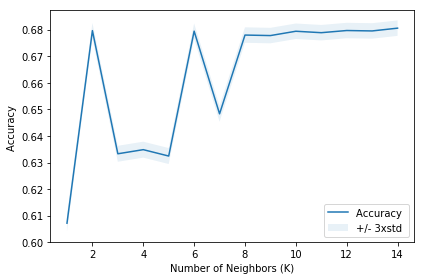

The best accuracy was with 0.6805297397769516 with k= 14


In [47]:
plt.plot(range(1,Ks),mean_acc)
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

neigh = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X1_train, y1_train)



In [48]:
#rebuild the model with K = 14
from sklearn.neighbors import KNeighborsClassifier
k = 14
#Train Model and Predict  
kNN_model1 = KNeighborsClassifier(n_neighbors=k).fit(X1_train,y1_train)
kNN_model1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='uniform')

In [49]:
yhatKNN1 = kNN_model1.predict(X1_test)
yhatKNN1[0:5]

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y1_train, kNN_model1.predict(X1_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y1_test, yhatKNN1))

from sklearn.metrics import f1_score
f1_score(y1_test, yhatKNN1, average='weighted') 

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y1_test, yhatKNN1)

print ("Jaccard Similarity: ",jaccard_similarity_score(y1_test, yhatKNN1))
print ("F1 Score: ",f1_score(y1_test, yhatKNN1, average='weighted'))

Train set Accuracy:  0.6811176083336561
Test set Accuracy:  0.6805297397769516
Jaccard Similarity:  0.6805297397769516
F1 Score:  0.5613462372481831


In [50]:
print(yhatKNN1)

print(y1_test)

e=yhatKNN1-y1_test

print("Count where predicted matches actual:",np.count_nonzero(e == 0) )

print("Count where severe predicted, minor actual:", np.count_nonzero(e == 1))

print("Count where minor predicted, severe actual:", np.count_nonzero(e == -1))

[1 1 1 ... 1 1 1]
[2 1 1 ... 1 1 2]
Count where predicted matches actual: 17574
Count where severe predicted, minor actual: 176
Count where minor predicted, severe actual: 8074


# Decision Tree

In [51]:
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree



#Modelling
modeltree1 = DecisionTreeClassifier(criterion="entropy")
modeltree1.fit(X1_train, y1_train)

#Prediction
predTree1 = modeltree1.predict(X1_test)
print(predTree1[0:5])
print(y1_test[0:5])

names = CleanFeature.columns

print(names)

print("DecisionTree Accuracy: ", metrics.accuracy_score(y1_test, predTree1))
print ("f1 score : ", f1_score(y1_test, predTree1, average='weighted'))
print ("jaccard similarity score : ", jaccard_similarity_score(y1_test, predTree1))

[1 1 1 1 1]
[2 1 1 1 2]
Index(['WEATHER', 'UNDERINFL', 'ROADCOND', 'LIGHTCOND', 'SPEEDING',
       'INATTENTIONIND'],
      dtype='object')
DecisionTree Accuracy:  0.6823884758364313
f1 score :  0.5545833831556372
jaccard similarity score :  0.6823884758364313


In [52]:
print(predTree1)

print(y1_test)

f=predTree1-y1_test

print("Count where predicted matches actual:",np.count_nonzero(f == 0) )

print("Count where severe predicted, minor actual:", np.count_nonzero(f == 1))

print("Count where minor predicted, severe actual:", np.count_nonzero(f == -1))

[1 1 1 ... 1 1 1]
[2 1 1 ... 1 1 2]
Count where predicted matches actual: 17622
Count where severe predicted, minor actual: 16
Count where minor predicted, severe actual: 8186


# Support Vector Machine

In [53]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import svm

#Modelling
clf = svm.SVC(kernel="sigmoid")
clf.fit(X1_train, y1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [54]:
#Predict
yhat1 = clf.predict(X1_test)
yhat1

array([1, 1, 1, ..., 2, 1, 1])

In [55]:
#Evaluation
from sklearn.metrics import f1_score
print("F1 Score",f1_score(y1_test,yhat1, average="weighted"))
print("array",yhat1)

F1 Score 0.571265328821027
array [1 1 1 ... 2 1 1]


In [56]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y1_test, yhat1)

0.5983581164807931

In [57]:
print(yhat1)

print(y1_test)

g=yhat1-y1_test

print("Count where predicted matches actual:",np.count_nonzero(g == 0) )

print("Count where severe predicted, minor actual:", np.count_nonzero(g == 1))

print("Count where minor predicted, severe actual:", np.count_nonzero(g == -1))

[1 1 1 ... 2 1 1]
[2 1 1 ... 1 1 2]
Count where predicted matches actual: 15452
Count where severe predicted, minor actual: 3766
Count where minor predicted, severe actual: 6606


# Logistic Regression

In [58]:
#Modelling
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver="liblinear").fit(X1_train,y1_train)

In [59]:
#Predict
yhat_LRR1 = LR.predict(X1_test)
yhat_prob1 = LR.predict_proba(X1_test)

#Evaluation
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y1_test,yhat_LRR1)

0.6825046468401487

In [60]:
yhat_LRR1

array([1, 1, 1, ..., 1, 1, 1])

In [61]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y1_test, yhat_LRR1)

from sklearn.metrics import log_loss
log_loss(y1_test, yhat_prob1)

from sklearn.metrics import f1_score
f1_score(y1_test, yhat_LRR1, average='weighted')


print ("Jaccard Similarity: ",jaccard_similarity_score(y1_test, yhat_LRR1))
print ("F1 Score: ",f1_score(y1_test, yhat_LRR1, average='weighted'))
print ("Log Loss: ",log_loss(y1_test, yhat_prob1))

Jaccard Similarity:  0.6825046468401487
F1 Score:  0.5537132914708104
Log Loss:  0.6240398533847334


In [62]:
print(yhat_LRR1)

print(y1_test)

h=yhat_LRR1-y1_test

print("Count where predicted matches actual:",np.count_nonzero(h == 0) )

print("Count where severe predicted, minor actual:", np.count_nonzero(h == 1))

print("Count where minor predicted, severe actual:", np.count_nonzero(h == -1))

[1 1 1 ... 1 1 1]
[2 1 1 ... 1 1 2]
Count where predicted matches actual: 17625
Count where severe predicted, minor actual: 0
Count where minor predicted, severe actual: 8199


In [65]:
#Model Evaluation - summary
knn_pred1=neigh.predict(X1_test)
jc11=jaccard_similarity_score(y1_test, knn_pred1)
fs11=f1_score(y1_test, knn_pred1, average='weighted')

tree_pred1=modeltree.predict(X1_test)
jc21=jaccard_similarity_score(y1_test, tree_pred1)
fs21=f1_score(y1_test, tree_pred1, average='weighted')

svm_pred1=clf.predict(X1_test)
jc31=jaccard_similarity_score(y1_test, svm_pred1)
fs31=f1_score(y1_test, svm_pred1, average='weighted')

log_pred1=LR.predict(X1_test)
proba=LR.predict_proba(X1_test)
jc41=jaccard_similarity_score(y1_test, log_pred1)
fs41=f1_score(y1_test, log_pred1, average='weighted')  
ll41=log_loss(y1_test, proba)

list_jc1 = [jc11, jc21, jc31, jc41]
list_fs1 = [fs11, fs21, fs31, fs41]
list_ll1 = ['NA', 'NA', 'NA', ll41]


import pandas as pd

# fomulate the report format
df11 = pd.DataFrame(list_jc1, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df11.columns = ['Jaccard']
df11.insert(loc=1, column='F1-score', value=list_fs1)
df11.insert(loc=2, column='LogLoss', value=list_ll1)
df11.columns.name = 'Algorithm'
df11

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.680530,0.561346,NA
Decision Tree,0.682814,0.554932,NA
SVM,0.598358,0.571265,NA
Logistic Regression,0.682505,0.553713,0.62404
